## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [4]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [5]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.00MB/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]


Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [9]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [10]:
len(fmnist_dataset_test)

10000

In [11]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [ ]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 550),
            nn.ReLU(),
            nn.Linear(550, 500),
            nn.ELU(),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Linear(250, 64),
            nn.ELU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [ ]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 550]         431,750
              ReLU-3                  [-1, 550]               0
            Linear-4                  [-1, 500]         275,500
               ELU-5                  [-1, 500]               0
            Linear-6                  [-1, 250]         125,250
              ReLU-7                  [-1, 250]               0
            Linear-8                   [-1, 64]          16,064
               ELU-9                   [-1, 64]               0
           Linear-10                   [-1, 32]           2,080
             ReLU-11                   [-1, 32]               0
           Linear-12                   [-1, 10]             330
       LogSoftmax-13                   [-1, 10]               0
Total params: 850,974
Trainable params:

Your experiments come here:

In [ ]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.001) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss() # YOUR CODE HERE

# Your experiments, training and validation loops here

In [ ]:
our_losses = []
train_Accuracy = []
test_Accuracy = []



In [ ]:
EPOCHS = 7
model.train()
for epoha in range(EPOCHS):

        train_loss = 0.0
        correct = 0
        total = 0

        for i, (picture, label) in enumerate(train_loader):
            picture, label = picture.to(device), label.to(device)

            opt.zero_grad()

            outputs = model(picture)

            loss = loss_func(outputs, label)



            loss.backward()
            opt.step()

            # Подсчет статистик
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

        # Подсчитываем точность на обучающих данных
        train_accuracy = 100 * correct / total
        our_losses.append(train_loss / len(train_loader))
        train_Accuracy.append(train_accuracy)

        # Печать статистики за эпоху
        print(f'Epoha {epoha+1}/{EPOCHS}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')

Epoha 1/7, Loss: 0.2098, Accuracy: 92.00%
Epoha 2/7, Loss: 0.1986, Accuracy: 92.49%
Epoha 3/7, Loss: 0.1918, Accuracy: 92.76%
Epoha 4/7, Loss: 0.1917, Accuracy: 92.77%
Epoha 5/7, Loss: 0.1837, Accuracy: 93.07%
Epoha 6/7, Loss: 0.1755, Accuracy: 93.37%
Epoha 7/7, Loss: 0.1733, Accuracy: 93.45%


In [ ]:
print(test_loader)

Для достижения точности  >= 0.885 test accuracy было достаточно 3 этпохи.

In [ ]:
# Оценка модели
model.eval()
correct = 0
total = 0
with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
test_Accuracy.append(test_accuracy)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 88.81%


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():

    for pictures, label in test_loader:
        pictures, label = pictures.to(device), label.to(device)
        outputs = model(pictures)
        _, predicted = torch.max(outputs.data, 1)
        total += pictures.size(0)

        correct += (predicted == label).sum().item()


test_accuracy = 100 * correct / total
test_Accuracy.append(test_accuracy)
print(f'correct: {correct:.2f}%')
print(f'total: {total:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

correct: 8881.00%
total: 10000.00%
Test Accuracy: 88.81%


In [ ]:
print(our_losses)
print(len(our_losses))


[0.5838069614571041, 0.3846003170143058, 0.34686095761591945, 0.31997172108718325, 0.2988229753620335, 0.28413665399495475, 0.2727833513829754, 0.25983650248442125, 0.2499170291430152, 0.23988355251390542, 0.23024117994283053, 0.22576387279005702, 0.21656092245187333, 0.2098179097527634, 0.19863147186889832, 0.19182949684766817, 0.19170777461549113, 0.18372050012702118, 0.17548361955992958, 0.17334559681350742]
20


range(1, 8)

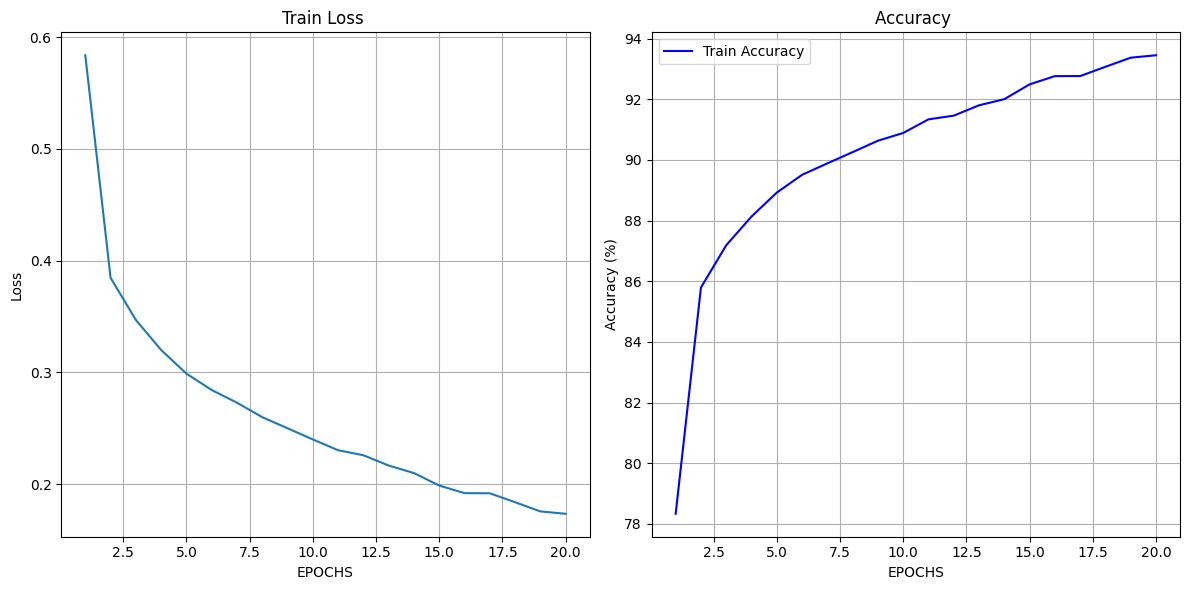

In [ ]:
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(our_losses)+1), our_losses, label='Train Loss')
plt.title('Train Loss ')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_Accuracy)+1), train_Accuracy, label='Train Accuracy', color='b')
plt.title('Accuracy ')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [12]:
#сожмем датасет
from torch.utils.data import DataLoader, Subset

#train_subset = Subset(fmnist_dataset_train, np.random.choice(len(fmnist_dataset_train), 1000, replace=False))  # 1000 примеров
#train_loader_over = DataLoader(train_subset, batch_size=64, shuffle=True)
#test_loader_over = DataLoader(fmnist_dataset_test, batch_size=64, shuffle=False)

class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 2000),
            nn.ReLU(),
            nn.BatchNorm1d(2000),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout
            nn.Linear(2000, 1800),
            nn.ELU(),
            nn.Linear(1800, 1000),
            nn.ReLU(),
            nn.BatchNorm1d(1000),
            nn.Dropout(0.5),
            nn.Linear(1000, 700),
            nn.ELU(),
            nn.Linear(700, 500),
            nn.ReLU(),
            nn.Linear(500, num_classes),

        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [23]:
#сожмем датасет
from torch.utils.data import DataLoader, Subset

train_subset = Subset(fmnist_dataset_train, np.random.choice(len(fmnist_dataset_train), 1000, replace=False))  # 1000 примеров
train_loader_over = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader_over = DataLoader(fmnist_dataset_test, batch_size=64, shuffle=False)

class OverfittingNeuralNetwork1(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 2000),
            nn.ReLU(),
            nn.BatchNorm1d(2000),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout
            nn.Linear(2000, 1800),
            nn.ELU(),
            nn.Linear(1800, 1500),
            nn.ReLU(),
            nn.Linear(1500, 1200), #слишком сложная модель
            nn.ReLU(),
            nn.BatchNorm1d(1200), # должна привести к переобучению
            nn.Dropout(0.5),
            nn.Linear(1200, 700),
            nn.ELU(),
            nn.Linear(700, 500),
            nn.ReLU(),
            nn.Linear(500, num_classes),

        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [13]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 2000]       1,570,000
              ReLU-3                 [-1, 2000]               0
       BatchNorm1d-4                 [-1, 2000]           4,000
           Dropout-5                 [-1, 2000]               0
            Linear-6                 [-1, 1800]       3,601,800
               ELU-7                 [-1, 1800]               0
            Linear-8                 [-1, 1000]       1,801,000
              ReLU-9                 [-1, 1000]               0
      BatchNorm1d-10                 [-1, 1000]           2,000
          Dropout-11                 [-1, 1000]               0
           Linear-12                  [-1, 700]         700,700
              ELU-13                  [-1, 700]               0
           Linear-14                  [

In [14]:
model = OverfittingNeuralNetwork().to(device)

opt = torch.optim.Adam(model.parameters(), lr=0.001) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss() # YOUR CODE HERE

# Your experiments, come here

In [19]:
our_losses = []
our_test_losses = []
train_Accuracy = []
test_Accuracy = []



In [20]:
EPOCHS = 30
model.train()
for epoha in range(EPOCHS):

        train_loss = 0.0
        correct = 0
        total = 0

        for i, (picture, label) in enumerate(train_loader):
            picture, label = picture.to(device), label.to(device)

            opt.zero_grad()

            outputs = model(picture)

            loss = loss_func(outputs, label)



            loss.backward()
            opt.step()

            # Подсчет статистик
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

        # Подсчитываем точность на обучающих данных
        train_accuracy = 100 * correct / total
        our_losses.append(train_loss / len(train_loader))
        train_Accuracy.append(train_accuracy)


        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_func(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_Accuracy.append(test_accuracy)
        our_test_losses.append(test_loss / len(test_loader))
        print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')


        # Печать статистики за эпоху
        print(f'Epoha {epoha+1}/{EPOCHS}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')

Test Loss: 0.3468, Test Accuracy: 87.46%
Epoha 1/30, Loss: 0.3328, Accuracy: 87.95%
Test Loss: 0.3277, Test Accuracy: 88.72%
Epoha 2/30, Loss: 0.2380, Accuracy: 91.08%
Test Loss: 0.3331, Test Accuracy: 88.56%
Epoha 3/30, Loss: 0.2125, Accuracy: 91.98%
Test Loss: 0.3129, Test Accuracy: 89.77%
Epoha 4/30, Loss: 0.1986, Accuracy: 92.47%
Test Loss: 0.3186, Test Accuracy: 89.28%
Epoha 5/30, Loss: 0.1890, Accuracy: 92.74%
Test Loss: 0.3368, Test Accuracy: 89.27%
Epoha 6/30, Loss: 0.1828, Accuracy: 93.08%
Test Loss: 0.3380, Test Accuracy: 89.21%
Epoha 7/30, Loss: 0.1801, Accuracy: 93.12%
Test Loss: 0.3497, Test Accuracy: 89.32%
Epoha 8/30, Loss: 0.1713, Accuracy: 93.48%
Test Loss: 0.3456, Test Accuracy: 89.68%
Epoha 9/30, Loss: 0.1642, Accuracy: 93.74%
Test Loss: 0.3606, Test Accuracy: 89.67%
Epoha 10/30, Loss: 0.1602, Accuracy: 93.90%
Test Loss: 0.3547, Test Accuracy: 89.52%
Epoha 11/30, Loss: 0.1539, Accuracy: 94.17%
Test Loss: 0.3486, Test Accuracy: 89.20%
Epoha 12/30, Loss: 0.1484, Accura

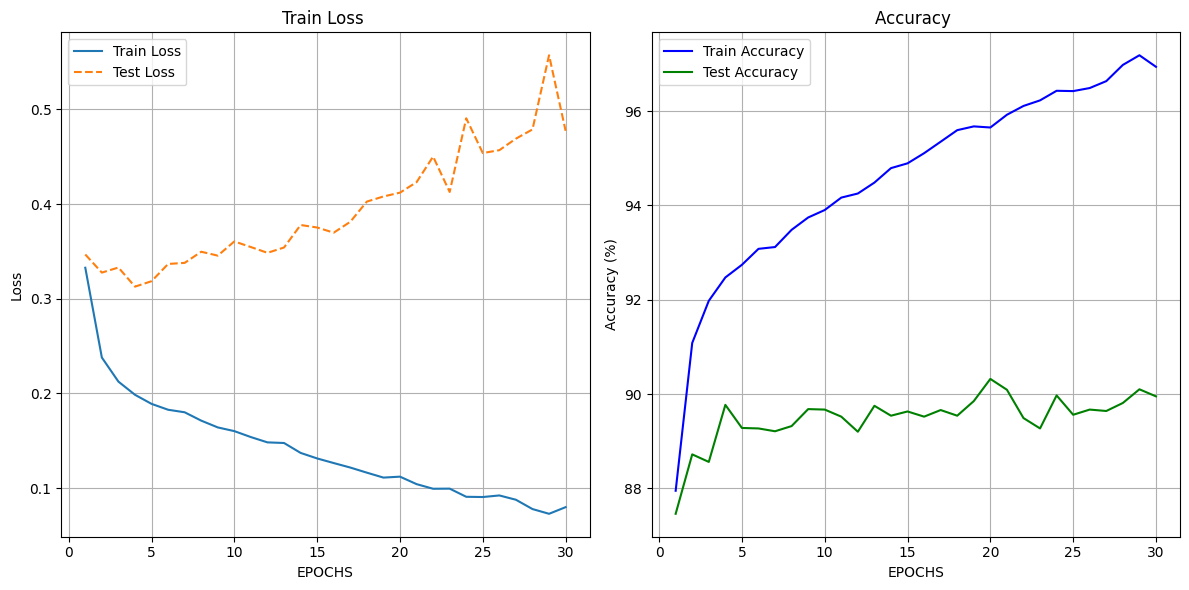

In [22]:
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(our_losses)+1), our_losses, label='Train Loss')
plt.plot(range(1, len(our_test_losses)+1), our_test_losses, label='Test Loss', linestyle='--')
plt.title('Train Loss ')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_Accuracy)+1), train_Accuracy, label='Train Accuracy', color='b')
plt.plot(range(1, len(test_Accuracy)+1), test_Accuracy, label='Test Accuracy', color='g')
plt.title('Accuracy ')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

Потери на тестовом наборе увеличиваются по мере увеличения сложности модели, это говорит о переобучении модели. Мы видим, что точность на тренировочной выборке продолжает расти в то время, как рост точности на тестовой выборке прекратился.


### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

Для уменьшения переобучения возьмем туже сеть что и во втором задании, но уменьшим количество нейронов в каждом слое, а также применим регуляризацию.

In [27]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here

            nn.Linear(input_shape, 200),
            nn.ReLU(),
            nn.BatchNorm1d(200),  # Batch Normalization
            nn.Dropout(0.5),  # Dropout
            nn.Linear(200, 180),
            nn.ELU(),
            nn.Linear(180, 100),
            nn.ReLU(),
            nn.BatchNorm1d(100),
            nn.Dropout(0.5),
            nn.Linear(100, 70),
            nn.ELU(),
            nn.Linear(70, 50),
            nn.ReLU(),
            nn.Linear(50, num_classes),
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [29]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 200]         157,000
              ReLU-3                  [-1, 200]               0
       BatchNorm1d-4                  [-1, 200]             400
           Dropout-5                  [-1, 200]               0
            Linear-6                  [-1, 180]          36,180
               ELU-7                  [-1, 180]               0
            Linear-8                  [-1, 100]          18,100
              ReLU-9                  [-1, 100]               0
      BatchNorm1d-10                  [-1, 100]             200
          Dropout-11                  [-1, 100]               0
           Linear-12                   [-1, 70]           7,070
              ELU-13                   [-1, 70]               0
           Linear-14                   

In [30]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.001) # YOUR CODE HERE
loss_func = nn.CrossEntropyLoss() # YOUR CODE HERE

# Your experiments, come here
# Your experiments, come here

In [31]:
our_losses = []
our_test_losses = []
train_Accuracy = []
test_Accuracy = []



In [32]:
EPOCHS = 30
model.train()
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(opt, step_size=5, gamma=0.5)
for epoha in range(EPOCHS):

        train_loss = 0.0
        correct = 0
        total = 0

        for i, (picture, label) in enumerate(train_loader):
            picture, label = picture.to(device), label.to(device)

            opt.zero_grad()

            outputs = model(picture)

            loss = loss_func(outputs, label)



            loss.backward()
            opt.step()

            # Подсчет статистик
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

        # Подсчитываем точность на обучающих данных
        train_accuracy = 100 * correct / total
        our_losses.append(train_loss / len(train_loader))
        train_Accuracy.append(train_accuracy)


        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_func(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_Accuracy.append(test_accuracy)
        our_test_losses.append(test_loss / len(test_loader))
        print(f'Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')


        # Печать статистики за эпоху
        print(f'Epoha {epoha+1}/{EPOCHS}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')
                # Обновление learning rate
        scheduler.step()

Test Loss: 0.4812, Test Accuracy: 82.42%
Epoha 1/30, Loss: 0.6579, Accuracy: 77.11%
Test Loss: 0.4052, Test Accuracy: 85.08%
Epoha 2/30, Loss: 0.4042, Accuracy: 85.13%
Test Loss: 0.3831, Test Accuracy: 85.95%
Epoha 3/30, Loss: 0.3477, Accuracy: 87.06%
Test Loss: 0.3806, Test Accuracy: 86.17%
Epoha 4/30, Loss: 0.3253, Accuracy: 88.07%
Test Loss: 0.3550, Test Accuracy: 87.24%
Epoha 5/30, Loss: 0.3086, Accuracy: 88.56%
Test Loss: 0.3338, Test Accuracy: 87.96%
Epoha 6/30, Loss: 0.2685, Accuracy: 89.98%
Test Loss: 0.3314, Test Accuracy: 87.91%
Epoha 7/30, Loss: 0.2566, Accuracy: 90.27%
Test Loss: 0.3195, Test Accuracy: 88.36%
Epoha 8/30, Loss: 0.2480, Accuracy: 90.65%
Test Loss: 0.3262, Test Accuracy: 88.25%
Epoha 9/30, Loss: 0.2406, Accuracy: 90.93%
Test Loss: 0.3156, Test Accuracy: 88.64%
Epoha 10/30, Loss: 0.2340, Accuracy: 91.17%
Test Loss: 0.3179, Test Accuracy: 88.88%
Epoha 11/30, Loss: 0.2080, Accuracy: 92.12%
Test Loss: 0.3186, Test Accuracy: 88.73%
Epoha 12/30, Loss: 0.2010, Accura

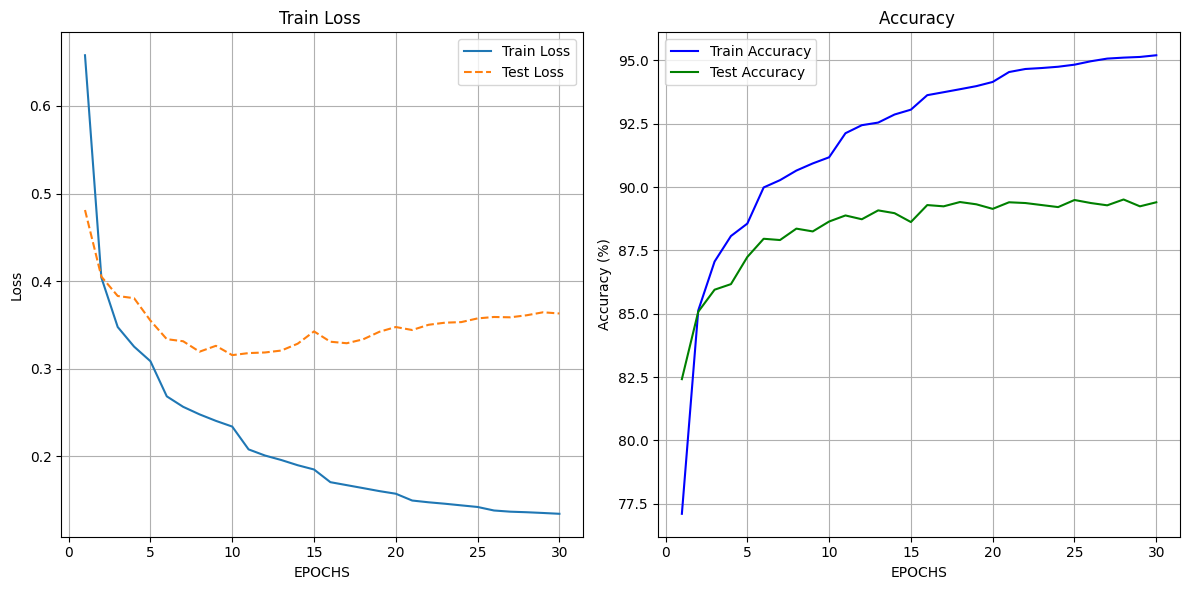

In [33]:
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(our_losses)+1), our_losses, label='Train Loss')
plt.plot(range(1, len(our_test_losses)+1), our_test_losses, label='Test Loss', linestyle='--')
plt.title('Train Loss ')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_Accuracy)+1), train_Accuracy, label='Train Accuracy', color='b')
plt.plot(range(1, len(test_Accuracy)+1), test_Accuracy, label='Test Accuracy', color='g')
plt.title('Accuracy ')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

### Conclusions:

Для снижения риска переобучения и повышения производительности модели можно применить несколько регуляризационных техник, включая Dropout и Batch Normalization, а также уменьшить размер модели. Вот основные шаги:

Снижение сложности модели: В этой конфигурации количество нейронов в слоях уменьшено по сравнению с предыдущими версиями. Это помогает избежать переобучения, особенно при работе с небольшими датасетами.

Внедрение Batch Normalization: Использование BatchNorm1d после каждого линейного слоя способствует стабилизации процесса обучения, ускоряет сходимость и помогает предотвратить переобучение.

Применение Dropout: Введение Dropout с коэффициентом 0.5 между слоями позволяет модели не слишком зависеть от определенных нейронов, что способствует регуляризации.

Оптимизатор Adam: Для повышения стабильности обучения используется оптимизатор Adam, который обеспечивает лучшие результаты по сравнению с традиционными методами.

Планировщик обучения (LR Scheduler): Добавление StepLR, который уменьшает скорость обучения через каждые 5 эпох, помогает предотвратить переобучение и ускоряет сходимость модели, делает ее более стабильной.